In [1]:
import pandas as pd
import numpy as np

In [34]:
data = pd.read_csv('loan_data_set.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Outlier Treatment 

#### 1. Quantile based Flooring and Capping Method

In [7]:
arr = np.array([10, 20, 37, 40, 55, 60, 70, 83, 91, 100])
arr

array([ 10,  20,  37,  40,  55,  60,  70,  83,  91, 100])

#### np.where()

- Syntax : np.where(condition, value, [arr, Series, list])

- When the condition is True it replace the values in [arr, Series, list] with the specified value

In [8]:
np.where(arr % 2 == 0, 500, arr)

array([500, 500,  37, 500,  55, 500, 500,  83,  91, 500])

In [9]:
np.where(arr > 50, 750, arr)

array([ 10,  20,  37,  40, 750, 750, 750, 750, 750, 750])

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: xlabel='LoanAmount'>

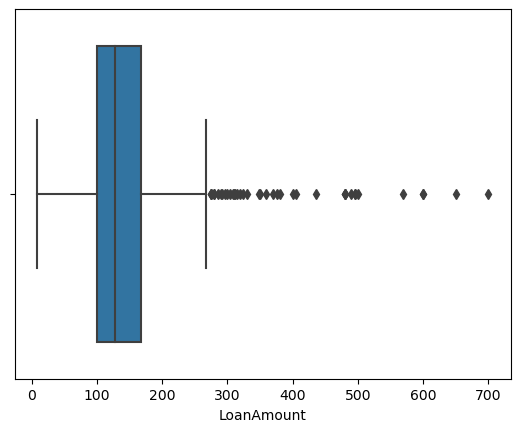

In [35]:
import seaborn as sns
sns.boxplot(x = 'LoanAmount', data = data)

In [36]:
data['LoanAmount'].skew()

2.677551679256059

In [37]:
print(data['LoanAmount'].quantile(0.90))
print(data['LoanAmount'].quantile(0.10))

235.79999999999995
71.0


In [38]:
data['LoanAmount'] = np.where(data['LoanAmount'] < 71, 71, data['LoanAmount'])
data['LoanAmount'] = np.where(data['LoanAmount'] > 235, 235, data['LoanAmount'])

<Axes: xlabel='LoanAmount'>

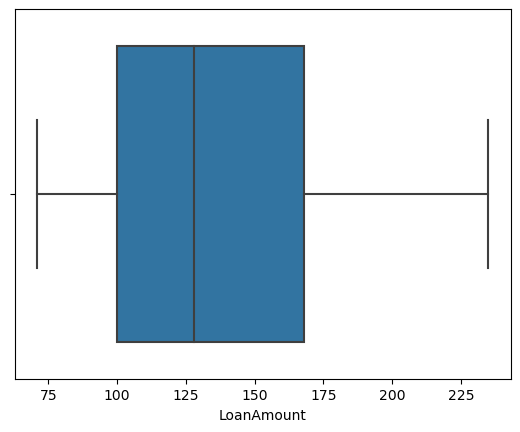

In [39]:
sns.boxplot(x = 'LoanAmount', data = data)

In [40]:
data['LoanAmount'].skew()

0.6231463951818582

### 2. Outlier Trimming

<Axes: xlabel='CoapplicantIncome'>

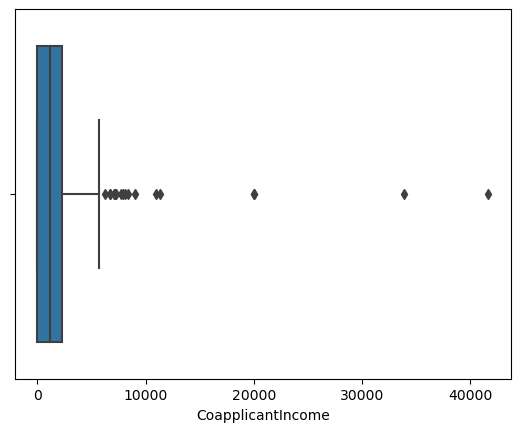

In [43]:
sns.boxplot(x = 'CoapplicantIncome', data = data)

In [44]:
data['CoapplicantIncome'].skew()

7.491531216657306

In [46]:
a = data['CoapplicantIncome'].quantile(0.75)
b = data['CoapplicantIncome'].quantile(0.25)
print(a)
print(b)

2297.25
0.0


In [50]:
ind = (data['CoapplicantIncome'] > 2297.25) | (data['CoapplicantIncome'] < 0)
ind

0      False
1      False
2      False
3       True
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: CoapplicantIncome, Length: 614, dtype: bool

In [51]:
ind.sum()

154

In [60]:
x = data[(data['CoapplicantIncome'] > 2297.25) | (data['CoapplicantIncome'] < 0)].index
x

Int64Index([  3,   5,   7,   9,  12,  13,  19,  21,  24,  30,
            ...
            579, 581, 585, 590, 593, 600, 601, 603, 605, 606],
           dtype='int64', length=154)

In [61]:
data['CoapplicantIncome'] = data['CoapplicantIncome'].drop(x)

In [62]:
data['CoapplicantIncome'].skew()

0.6834089713639013

<Axes: xlabel='CoapplicantIncome'>

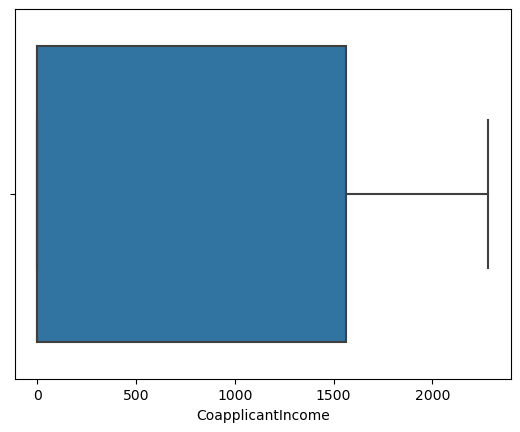

In [63]:
sns.boxplot(x = 'CoapplicantIncome', data = data)

#### 3. Log Transformation method

In [64]:
data['ApplicantIncome'].skew()

6.539513113994625

<Axes: xlabel='ApplicantIncome'>

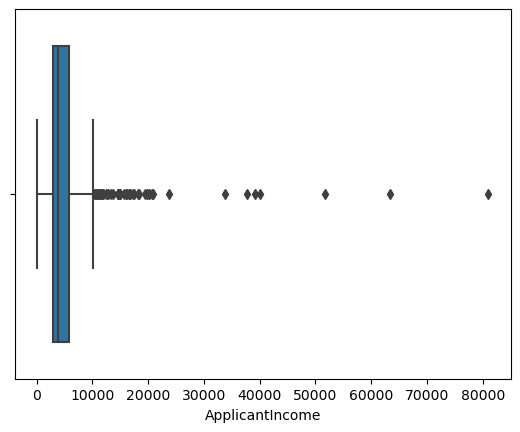

In [65]:
sns.boxplot(x = 'ApplicantIncome', data = data)

In [66]:
data['ApplicantIncome'].head()

0    5849
1    4583
2    3000
3    2583
4    6000
Name: ApplicantIncome, dtype: int64

In [67]:
np.log(5849)

8.674025985443025

In [68]:
np.log(4583)

8.430109084509125

In [69]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['ApplicantIncome']

0      8.674026
1      8.430109
2      8.006368
3      7.856707
4      8.699515
         ...   
609    7.972466
610    8.320205
611    8.996157
612    8.933664
613    8.430109
Name: ApplicantIncome, Length: 614, dtype: float64

In [70]:
data['ApplicantIncome'].skew()

0.4795799780016222

<Axes: xlabel='ApplicantIncome'>

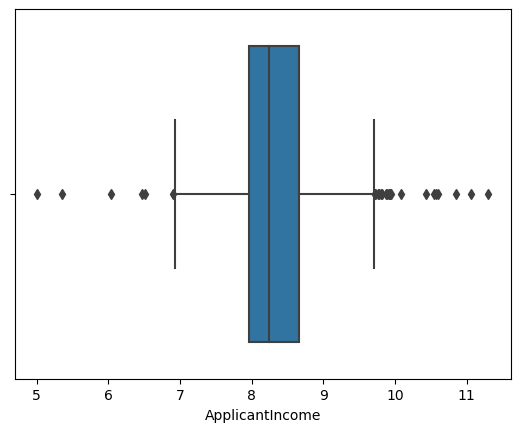

In [71]:
sns.boxplot(x = data['ApplicantIncome'])

In [72]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [73]:
df['total_bill'].skew()

1.1332130376158205

<Axes: xlabel='total_bill'>

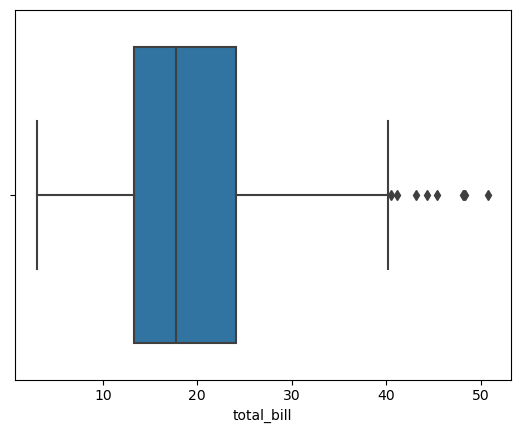

In [74]:
sns.boxplot(x = df['total_bill'])

In [75]:
df['total_bill'] = np.log(df['total_bill'])
df['total_bill']

0      2.832625
1      2.336020
2      3.044999
3      3.164631
4      3.202340
         ...   
239    3.368330
240    3.302481
241    3.121042
242    2.880321
243    2.932792
Name: total_bill, Length: 244, dtype: float64

In [76]:
df['total_bill'].skew()

-0.11623079290253824

<Axes: xlabel='total_bill'>

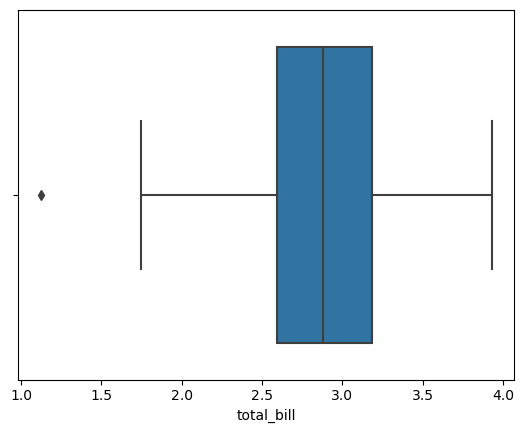

In [77]:
sns.boxplot(x = df['total_bill'])

#### 4. Replacing outliers with median values

In [80]:
data = pd.read_csv('loan_data_set.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
data['LoanAmount'].skew()

2.677551679256059

In [83]:
data['LoanAmount'].quantile(0.85)

192.0

In [84]:
data['LoanAmount'].quantile(0.15)

84.64999999999999

In [82]:
data['LoanAmount'].median()

128.0

In [85]:
data['LoanAmount'] = np.where(data['LoanAmount'] > 192, 128, data['LoanAmount'])

In [86]:
data['LoanAmount'].skew()

-0.2894860261963477

In [87]:
data['LoanAmount'] = np.where(data['LoanAmount'] < 84, 128, data['LoanAmount'])

In [88]:
data['LoanAmount'].skew()

0.6599877184786516

### 5. IQR score

In [90]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

ApplicantIncome      2877.5
CoapplicantIncome       0.0
LoanAmount            115.0
Loan_Amount_Term      360.0
Credit_History          1.0
Name: 0.25, dtype: float64
ApplicantIncome      5795.00
CoapplicantIncome    2297.25
LoanAmount            137.25
Loan_Amount_Term      360.00
Credit_History          1.00
Name: 0.75, dtype: float64
ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             22.25
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64


C:\Users\AMANT\AppData\Local\Temp\ipykernel_20012\192147652.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\AMANT\AppData\Local\Temp\ipykernel_20012\192147652.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)


In [99]:
low_end_outlier = Q1 - 1.5 * IQR
upp_end_outlier = Q3 + 1.5 * IQR
upp_end_outlier

ApplicantIncome      10171.250
CoapplicantIncome     5743.125
LoanAmount             170.625
Loan_Amount_Term       360.000
Credit_History           1.000
dtype: float64

In [93]:
s = (data < low_end_outlier) | (data  > upp_end_outlier)
s.sum()

C:\Users\AMANT\AppData\Local\Temp\ipykernel_20012\3523640644.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  s = (data < low_end_outlier) | (data  > upp_end_outlier)


ApplicantIncome      50
CoapplicantIncome    18
Credit_History       89
Dependents            0
Education             0
Gender                0
LoanAmount           55
Loan_Amount_Term     88
Loan_ID               0
Loan_Status           0
Married               0
Property_Area         0
Self_Employed         0
dtype: int64

In [101]:
data['ApplicantIncome'] = np.where(data['ApplicantIncome'] > 10171.25, 2917.50, data['ApplicantIncome'])

In [102]:
data['ApplicantIncome'].skew()

-3.0926475105464073

In [100]:
IQR

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             22.25
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64